Lambda School Data Science

*Unit 4, Sprint 1, Module 2*

---

# Vector Representations (Prepare)


As we learned yesterday, machines cannot interpret raw text. We need to transform that text into something we/machines can more readily analyze. Yesterday, we did simple counts of counts to summarize the content of Amazon reviews. Today, we'll extend those concepts to talk about vector representations such as Bag of Words (BoW) and word embedding models. We'll use those representations for search, visualization, and prepare for our classification day tomorrow. 

Processing text data to prepare it for machine learning models often means translating the information from documents into a numerical format. Bag-of-Words approaches (sometimes referred to as Frequency-Based word embeddings) accomplish this by "vectorizing" tokenized documents. This is done by representing each document as a row in a DataFrame and creating a column for each unique word in the corpora (group of documents). The presence or lack of a given word in a document is then represented either as a raw count of how many times a given word appears in a document (CountVectorizer) or as that word's TF-IDF score (TfidfVectorizer).

On the python side, we will be focusing on `sklearn` and `spacy` today.  

## Case Study

We're going to pretend we're on the datascience team at the BBC. We want to recommend articles to visitors to on the BBC website based on the article they just read. Our team wants 

**Dataset:**

[D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.](http://mlg.ucd.ie/datasets/bbc.html)
*Please note that the dataset has been sampled down to tech articles only.* 

## Learning Objectives
* <a href="#p1">Part 1</a>: Represent a document as a vector
* <a href="#p2">Part 2</a>: Query Documents by Similarity
* <a href="#p3">Part 3</a>: Apply word embedding models to create document vectors

# Represent a document as a vector (Learn)
<a id="p1"></a>

## Overview

In this section, we are going to create Document Term Matrices (DTM). Each column represents a word. Each row represents a document. The value in each cell can be range of different things. The most traditional: counts of appearances of words, does the word appear at all (binary), and term-frequency inverse-document frequency (TF-IDF). 

**Discussion:** Don't we loose all the context and grammar if we do this? So Why does it work?

## Follow Along

In [1]:
""" Import Statements """

# Classics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import spacy
nlp = spacy.load("en_core_web_lg")

**Warm Up (_3 Minutes_)**

Extract the tokens from this sentence using Spacy. Text is from [OpenAI](https://openai.com/blog/better-language-models/)

In [3]:
text = """
Would you recommend downloading TikTok? Secretary of State Mike Pompeo was asked that question on Monday night on Fox News.

"Only if you want your private information in the hands of the Chinese Communist Party," he replied.

Asked if he would ban Chinese apps - including TikTok - he said: "I don't want to get out in front of the president, but it's something we're looking at".

That is a very worrying statement for TikTok.

The huge Chinese social media company has experienced phenomenal growth in the last three years. It's been downloaded more than two billion times.

But around the world, and not just in the US, TikTok is facing a backlash.

It's finding out the hard way that being international, a tech company, and Chinese isn't a great combination right now.

By far its largest market, India, banned TikTok last week, along with 58 other Chinese apps.

Officially security concerns were given as the reason, but that isn't the whole story.

Two weeks before, a border skirmish on India's northern frontier with China left 20 Indian soldiers dead. It's not known how many Chinese troops were killed.

The fighting was said to be gruesome, hand-to-hand combat.
"""

In [5]:
doc = nlp(text.strip())

print([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])

['recommend', 'download', 'TikTok', 'Secretary', 'State', 'Mike', 'Pompeo', 'ask', 'question', 'Monday', 'night', 'Fox', 'News', '\n\n', 'want', 'private', 'information', 'hand', 'Chinese', 'Communist', 'Party', 'reply', '\n\n', 'ask', 'ban', 'chinese', 'app', 'include', 'TikTok', 'say', 'want', 'president', 'look', '\n\n', 'worrying', 'statement', 'TikTok', '\n\n', 'huge', 'chinese', 'social', 'medium', 'company', 'experience', 'phenomenal', 'growth', 'year', 'download', 'billion', 'time', '\n\n', 'world', 'TikTok', 'face', 'backlash', '\n\n', 'find', 'hard', 'way', 'international', 'tech', 'company', 'Chinese', 'great', 'combination', 'right', '\n\n', 'far', 'large', 'market', 'India', 'ban', 'TikTok', 'week', '58', 'chinese', 'app', '\n\n', 'officially', 'security', 'concern', 'give', 'reason', 'story', '\n\n', 'week', 'border', 'skirmish', 'India', 'northern', 'frontier', 'China', 'leave', '20', 'indian', 'soldier', 'dead', 'know', 'chinese', 'troop', 'kill', '\n\n', 'fighting', 's

In [6]:
import os 

def gather_data(filefolder):
    """ Produces List of Documents from a Directory
    
    filefolder (str): a path of .txt files
    
    returns list of strings 
    """
    
    data = []
    
    files = os.listdir(filefolder) # Causes variation across machines
    
    for article in files: 
        
        path = os.path.join(filefolder, article)
                    
        if  path[-3:] == 'txt': # os ~endswith('txt')
            with open(path, 'rb') as f:
                data.append(f.read())
    
    return data

In [7]:
data = gather_data('./data')

In [14]:
data[0][:150]

b"Mobiles rack up 20 years of use\n\nMobile phones in the UK are celebrating their 20th anniversary this weekend.\n\nBritain's first mobile phone call was m"

### CountVectorizer

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text = text.split("\n")

AttributeError: 'list' object has no attribute 'split'

Slido Question:
is \n different from \n\n? when starting a new paragraph, you generally hit enter twice. does \n represent one press of the enter key?

In [20]:
question= """This is the first line.
This is the second line.

This is the fourth line.
"""

In [22]:
question.strip("\n")

'This is the first line.\nThis is the second line.\n\nThis is the fourth line.'

In [19]:
text = [t for t in text if len(t) > 0]
print(text)
print(len(text))

['Would you recommend downloading TikTok? Secretary of State Mike Pompeo was asked that question on Monday night on Fox News.', '"Only if you want your private information in the hands of the Chinese Communist Party," he replied.', 'Asked if he would ban Chinese apps - including TikTok - he said: "I don\'t want to get out in front of the president, but it\'s something we\'re looking at".', 'That is a very worrying statement for TikTok.', "The huge Chinese social media company has experienced phenomenal growth in the last three years. It's been downloaded more than two billion times.", 'But around the world, and not just in the US, TikTok is facing a backlash.', "It's finding out the hard way that being international, a tech company, and Chinese isn't a great combination right now.", 'By far its largest market, India, banned TikTok last week, along with 58 other Chinese apps.', "Officially security concerns were given as the reason, but that isn't the whole story.", "Two weeks before, a

In [15]:
type(dtm.todense())

numpy.matrixlib.defmatrix.matrix

In [23]:
# create the transformer
vect = CountVectorizer()

# build vocab
vect.fit(text)

# transform text
dtm = vect.transform(text)

# Create a Vocabulary
# The vocabulary establishes all of the possible words that we might use.

# The vocabulary dictionary does not represent the counts of words!!

In [24]:
print(vect.get_feature_names())

['20', '58', 'along', 'and', 'apps', 'around', 'as', 'asked', 'at', 'backlash', 'ban', 'banned', 'be', 'been', 'before', 'being', 'billion', 'border', 'but', 'by', 'china', 'chinese', 'combat', 'combination', 'communist', 'company', 'concerns', 'dead', 'don', 'downloaded', 'downloading', 'experienced', 'facing', 'far', 'fighting', 'finding', 'for', 'fox', 'front', 'frontier', 'get', 'given', 'great', 'growth', 'gruesome', 'hand', 'hands', 'hard', 'has', 'he', 'how', 'huge', 'if', 'in', 'including', 'india', 'indian', 'information', 'international', 'is', 'isn', 'it', 'its', 'just', 'killed', 'known', 'largest', 'last', 'left', 'looking', 'many', 'market', 'media', 'mike', 'monday', 'more', 'news', 'night', 'northern', 'not', 'now', 'of', 'officially', 'on', 'only', 'other', 'out', 'party', 'phenomenal', 'pompeo', 'president', 'private', 'question', 're', 'reason', 'recommend', 'replied', 'right', 'said', 'secretary', 'security', 'skirmish', 'social', 'soldiers', 'something', 'state', '

In [11]:
text[:25]

['We created a new dataset which emphasizes diversity of content, by scraping content from the Internet.',
 ' In order to preserve document quality, we used only pages which have been curated/filtered by humans—specifically, we used outbound links from Reddit which received at least 3 karma.',
 ' This can be thought of as a heuristic indicator for whether other users found the link interesting (whether educational or funny), leading to higher data quality than other similar datasets, such as CommonCrawl.']

In [25]:
print(dtm)

  (0, 7)	1
  (0, 30)	1
  (0, 37)	1
  (0, 73)	1
  (0, 74)	1
  (0, 76)	1
  (0, 77)	1
  (0, 81)	1
  (0, 83)	2
  (0, 89)	1
  (0, 92)	1
  (0, 95)	1
  (0, 99)	1
  (0, 105)	1
  (0, 110)	1
  (0, 113)	1
  (0, 121)	1
  (0, 131)	1
  (0, 133)	1
  (1, 21)	1
  (1, 24)	1
  (1, 46)	1
  (1, 49)	1
  (1, 52)	1
  (1, 53)	1
  :	:
  (9, 56)	1
  (9, 61)	1
  (9, 64)	1
  (9, 65)	1
  (9, 68)	1
  (9, 70)	1
  (9, 78)	1
  (9, 79)	1
  (9, 83)	1
  (9, 101)	1
  (9, 103)	1
  (9, 116)	1
  (9, 117)	1
  (9, 125)	1
  (9, 126)	1
  (9, 128)	1
  (10, 12)	1
  (10, 22)	1
  (10, 34)	1
  (10, 44)	1
  (10, 45)	2
  (10, 98)	1
  (10, 111)	1
  (10, 115)	2
  (10, 121)	1


In [26]:
# Dealing with Sparse Matrix
dtm.todense()

matrix([[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [27]:
type(dtm)

scipy.sparse.csr.csr_matrix

In [28]:
# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,20,58,along,and,apps,around,as,asked,at,backlash,...,weeks,were,whole,with,world,worrying,would,years,you,your
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0


In [29]:
data[0][:25]

b'Mobiles rack up 20 years '

In [30]:
len(data)

401

**Three Minute Challenge:** 
* Apply CountVectorizer to our BBC Data
* Store results in a dataframe called `dtm`
* Extra Challenge - Try to Customize CountVectorizer with Spacy Processing

In [31]:
# Apply CountVectorizer to our Data
# Use custom Spacy Vectorizer
# BBC articles in `data` variable

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words=nlp.Defaults.stop_words, max_features=1000)

#Learn our Vocab
vect.fit(data)

# Get sparse dtm
dtm = vect.transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP-DS14/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [34]:
dtm.head(50)

,000,10,100,11,12,14,15,18,20,200,...,worldwide,worm,worth,writing,xbox,xp,yahoo,year,years,york
0,1,2,0,0,0,0,0,1,3,0,...,0,0,0,0,0,0,0,0,4,1
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2,0,0
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,2,2,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,1,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2,1,0
7,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,2,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
9,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,2,0


In [33]:
dtm.shape

(401, 1000)

In [35]:
doc_len = [len(doc) for doc in data]

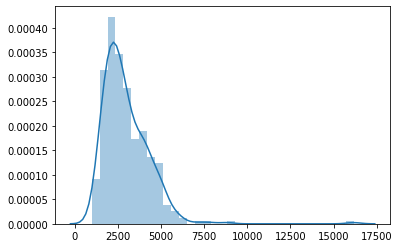

In [36]:
import seaborn as sns

sns.distplot(doc_len);

### TfidfVectorizer

## Term Frequency - Inverse Document Frequency (TF-IDF)

<center><img src="https://mungingdata.files.wordpress.com/2017/11/equation.png?w=430&h=336" width="300"></center>

Term Frequency: Percentage of words in document for each word

Document Frequency: A penalty for the word existing in a high number of documents.

The purpose of TF-IDF is to find what is **unique** to each document. Because of this we will penalize the term frequencies of words that are common across all documents which will allow for each document's most different topics to rise to the top.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(data)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000,10,100,101,104,10m,11,12,120,13,...,yoda,yoran,york,young,younger,youngsters,youth,zafi,zen,zombies
0,0.028940,0.066646,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.05528,0.058505,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.077901,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.061896,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

text data machines TikTok Chinese app Hong Kong

Bigrams
* "text data" 
* "data machines"

Trigram
* "text data machines"
* "data machines TikTok"


In [42]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=2,
                        max_features = 8000,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,.post,10,2004,50,ability,accord,add,anti,apple,ask,...,zone,zoom,£,£ 10,"£ 2,000",£ 20,£ 339,£ 50,£ 6,£ 99
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.028408,0.0,0.062923,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.085863,0.0,0.0,0.075339,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.040405,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [43]:
dtm.shape

(401, 8000)

## Challenge

During this module's project assignment, you will transform data science job listings to vector representations for analysis downstream. 

# Query Documents by Similarity (Learn)
<a id="p2"></a>

## Overview

Have you ever considered how a search bar works? You may just think that search bars simply match your input text againist the documents. While there are many different mechanisms for the 'match', one of the most classic is to search by similarity. We will apply n-dimensional distance to measure similarity, and query for input and output. 

## Follow Along

### Cosine Similarity (Brute Force)

In [44]:
# Calculate Distance of TF-IDF Vectors
from sklearn.metrics.pairwise import cosine_similarity

dist_matrix  = cosine_similarity(dtm)

In [45]:
# Turn it into a DataFrame

df = pd.DataFrame(dist_matrix)

In [46]:
# Our Similarity Matrix is ? size 
df.shape

(401, 401)

In [42]:
data[0][:100]

b'Mobiles rack up 20 years of use\n\nMobile phones in the UK are celebrating their 20th anniversary this'

In [47]:
# Each row is the similarity of one document to all other documents (including itself)
df[0][:5]

0    1.000000
1    0.069590
2    0.030359
3    0.006712
4    0.063760
Name: 0, dtype: float64

In [48]:
# Grab the row
df[df[0] < 1][0].sort_values(ascending=False)[:5]

92     0.344329
297    0.323841
300    0.273662
187    0.253112
63     0.248849
Name: 0, dtype: float64

In [49]:
print(data[0][:150])

b"Mobiles rack up 20 years of use\n\nMobile phones in the UK are celebrating their 20th anniversary this weekend.\n\nBritain's first mobile phone call was m"


In [50]:
print(data[92][:150])

b'Finding new homes for old phones\n\nRe-using old mobile phones is not just good for the environment, it has social benefits too.\n\nResearch has found tha'


### NearestNeighbor (K-NN) 

To address the computational inefficiencies of the brute-force approach, a variety of tree-based data structures have been invented. In general, these structures attempt to reduce the required number of distance calculations by efficiently encoding aggregate distance information for the sample. The basic idea is that if point  is very distant from point , and point  is very close to point , then we know that points  and  are very distant, without having to explicitly calculate their distance. In this way, the computational cost of a nearest neighbors search can be reduced to  or better. This is a significant improvement over brute-force for large data.

To address the inefficiencies of KD Trees in higher dimensions, the ball tree data structure was developed. Where KD trees partition data along Cartesian axes, ball trees partition data in a series of nesting hyper-spheres. This makes tree construction more costly than that of the KD tree, but results in a data structure which can be very efficient on highly structured data, even in very high dimensions.

A ball tree recursively divides the data into nodes defined by a centroid  and radius , such that each point in the node lies within the hyper-sphere defined by  and . The number of candidate points for a neighbor search is reduced through use of the triangle inequality:

With this setup, a single distance calculation between a test point and the centroid is sufficient to determine a lower and upper bound on the distance to all points within the node. Because of the spherical geometry of the ball tree nodes, it can out-perform a KD-tree in high dimensions, though the actual performance is highly dependent on the structure of the training data. In scikit-learn, ball-tree-based neighbors searches are specified using the keyword algorithm = 'ball_tree', and are computed using the class sklearn.neighbors.BallTree. Alternatively, the user can work with the BallTree class directly.

In [51]:
dtm.head()

,.post,10,2004,50,ability,accord,add,anti,apple,ask,...,zone,zoom,£,£ 10,"£ 2,000",£ 20,£ 339,£ 50,£ 6,£ 99
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.028408,0.0,0.062923,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.085863,0.0,0.0,0.075339,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.040405,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [52]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [53]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 0.        , 1.14513866, 1.16289223, 1.20527   ]]),
 array([[  0,  62,  92, 297, 300]]))

In [54]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[202]])

(array([[0.        , 1.32781559, 1.34368313, 1.34413098, 1.34783622]]),
 array([[202, 153, 203, 110, 127]]))

In [55]:
data[202][:200]

b'Man auctions ad space on forehead\n\nA 20-year-old US man is selling advertising space on his forehead to the highest bidder on website eBay.\n\nAndrew Fisher, from Omaha, Nebraska, said he would have a n'

In [56]:
data[153][:200]

b'Row brewing over peer-to-peer ads\n\nMusic download networks are proving popular not just with an audience of youngsters keen to take advantage of free music but with advertisers equally keen to reach o'

In [62]:
rndm_tech_article = [ """
Long before Venice became the destination of choice for millions of international holidaymakers, locals had a tradition of flânerie, an aimless stroll through the city’s calli, or walkways. They would bump into acquaintances for a chat and the occasional drink, an ombra de vin, a “shadow of wine,” as it’s called in the lagoon.

That tradition has been picked up again. The pandemic crushed the tourism industry, curtailing the hordes of annual visitors that made flânerie a near impossibility, and now many residents — particularly those furloughed or laid off — have more time and space to enjoy the city’s slow pace and faded beauty. But money is tight, for that sip of wine and everything else. Local taverns have begun accepting promises of future payments from regulars.

“People are like, I’ll pay you in September, when hopefully tourists will be back,” said Matteo Secchi, an unemployed hotel concierge. “If we don’t help each other, who will?”

Mr. Secchi, a native Venetian, started working in tourism when he was still in high school, 30 years ago. “My first job was to escort tourists from hotels to Murano’s glass shops,” he said. “Since I can remember, tourism has been our only economy, we thought it was a bottomless well, like oil for the Saudis.”

Venice certainly wasn’t alone. The economies of other European cities — Barcelona, Prague and others — grew to rely heavily on tourism, leaving them now particularly exposed to the side effects of the Covid-19 pandemic.

But there’s a new feeling many residents and local travel operators share: The crisis creates an opportunity to make future travel to and in their cities and regions more sustainable. This crossroads is sparking conversations on how to make tourism less taxing and more beneficial on urban infrastructure and for its local inhabitants.

In Venice, residents and local leaders hope their city can develop an economy that doesn’t revolve entirely around tourism, one that would draw international investors, expand the footprint of the city’s two universities and turn its empty buildings into environmental research facilities.

Yes, the pandemic has shuttered Venice’s lodging industry, said Claudio Scarpa, the president of Associazione Veneziana Albergatori, a body representing 430 hotels in Venice, but “it is also a precious occasion to rethink tourism.”

“This is the time to reclaim this city,” he said, “Or in a couple of years we’ll get back to complaining about overtourism.”

Other Venetians echoed that sentiment.

"""]


In [63]:
# Query for Sim of Random doc to BBC
new = tfidf.transform(rndm_tech_article)

In [59]:
new

<1x8000 sparse matrix of type '<class 'numpy.float64'>'
	with 222 stored elements in Compressed Sparse Row format>

In [64]:
nn.kneighbors(new.todense())

(array([[1.31761884, 1.34960505, 1.35473456, 1.35674713, 1.35694068]]),
 array([[166, 298,  15, 135, 158]]))

In [65]:
# Inspect Most relevant result
data[166]

b'Local net TV takes off in Austria\n\nAn Austrian village is testing technology that could represent the future of television.\n\nThe people of Engerwitzdorf are filming, editing and producing their own regional news channel. The channel covers local politics, sports, events and anything that residents want to film and are prepared to upload for others to watch on PCs. The pilot has been so successful that Telekom Austria is now considering setting up other projects elsewhere.\n\n"It\'s growing unbelievably fast," said Rudolf Fischer, head of Telekom Austria\'s fixed line division. The trial of Buntes Fernsehen (Multi-Coloured TV) was started in late 2004 and creates a net-based TV station run by the 8,000 residents of Engerwitzdorf. The hardware and software to turn video footage into edited programmes has been provided by Telekom Austria but this equipment, following training, has been turned over to the villagers. Any video programme created by the villagers is uploaded to a Buntes

How would I set a distance threshold for recommendations from my Knn model?

1. Select a sample size of query articles (say 10)
2. Then I would get the knn recommendations for those 10 articles ~5 recommendations each
3. For each of the 50 recs, I would label them as useful or not useful.
4. Take one of the following values as the threshold:
    - Max Distance of the Useful Labelled recs
    - 75% pertincle distnace of use labelled recs
    -  Min of the not useful labelled recs
    
Then after I have my model in production, I would similiar using A/B testing. 

## Challenge

In the module project assignment, you will apply one of these search techniques to retrieve documents related to a query document. 

# Apply word embedding models to create document vectors (Learn)
<a id="p3"></a>

## Overview
### BoW discards textual context

One of the limitations of Bag-of-Words approaches is that any information about the textual context surrounding that word is lost. This also means that with bag-of-words approaches often the only tools that we have for identifying words with similar usage or meaning and subsequently consolidating them into a single vector is through the processes of stemming and lemmatization which tend to be quite limited at consolidating words unless the two words are very close in their spelling or in their root parts-of-speech.

### Embedding approaches preserve more textual context
Word2Vec is an increasingly popular word embedding technique. Like Bag-of-words it learns a real-value vector representation for a predefined fixed-size vocabulary that is generated from a corpus of text. However, in contrast to BoW, Word2Vec approaches are much more capable of accounting for textual context, and are better at discovering words with similar meanings or usages (semantic or syntactic similarity).

### Word2Vec Intuition
### The Distribution Hypothesis

In order to understand how Word2Vec preserves textual context we have to understand what's called the Distribution Hypothesis (Reference: Distribution Hypothesis Theory  -https://en.wikipedia.org/wiki/Distributional_semantics. The Distribution Hypothesis operates under the assumption that words that have similar contexts will have similar meanings. Practically speaking, this means that if two words are found to have similar words both to the right and to the left of them throughout the corpora then those words have the same context and are assumed to have the same meaning. 

> "You shall know a word by the company it keeps" - John Firth

This means that we let the usage of a word define its meaning and its "similarity" to other words. In the following example, which words would you say have a similar meaning? 

**Sentence 1**: Traffic was light today

**Sentence 2**: Traffic was heavy yesterday

**Sentence 3**: Prediction is that traffic will be smooth-flowing tomorrow since it is a national holiday

What words in the above sentences seem to have a similar meaning if all you knew about them was the context in which they appeared above? 

Lets take a look at how this might work in action, the following example is simplified, but will give you an idea of the intuition for how this works.

#### Corpora:

1) "It was the sunniest of days."

2) "It was the raniest of days."

#### Vocabulary:

{"it": 1, "was": 2, "the": 3, "of": 4, "days": 5, "sunniest": 6, "raniest": 7}

### Vectorization

|       doc   | START_was | it_the | was_sunniest | the_of | sunniest_days | of_it | days_was | it_the | was_raniest | raniest_days | of_END |
|----------|-----------|--------|--------------|--------|---------------|-------|----------|--------|-------------|--------------|--------|
| it       | 1         | 0      | 0            | 0      | 0             | 0     | 1        | 0      | 0           | 0            | 0      |
| was      | 0         | 1      | 0            | 0      | 0             | 0     | 0        | 1      | 0           | 0            | 0      |
| the      | 0         | 0      | 1            | 0      | 0             | 0     | 0        | 0      | 1           | 0            | 0      |
| sunniest | 0         | 0      | 0            | 1      | 0             | 0     | 0        | 0      | 0           | 0            | 0      |
| of       | 0         | 0      | 0            | 0      | 1             | 0     | 0        | 0      | 0           | 1            | 0      |
| days     | 0         | 0      | 0            | 0      | 0             | 0     | 0        | 0      | 0           | 0            | 1      |
| raniest  | 0         | 0      | 0            | 1      | 0             | 0     | 0        | 0      | 0           | 0            | 0      |

Each column vector represents the word's context -in this case defined by the words to the left and right of the center word. How far we look to the left and right of a given word is referred to as our "window of context." Each row vector represents the the different usages of a given word. Word2Vec can consider a larger context than only words that are immediately to the left and right of a given word, but we're going to keep our window of context small for this example. What's most important is that this vectorization has translated our documents from a text representation to a numeric one in a way that preserves information about the underlying context. 

We can see that words that have a similar context will have similar row-vector representations, but before looking that more in-depth, lets simplify our vectorization slightly. You'll notice that we're repeating the column-vector "it_the" twice. Lets combine those into a single vector by adding them element-wise. 

|       *   | START_was | it_the | was_sunniest | the_of | sunniest_days | of_it | days_was | was_raniest | raniest_days | of_END |
|----------|-----------|--------|--------------|--------|---------------|-------|----------|-------------|--------------|--------|
| it       | 1         | 0      | 0            | 0      | 0             | 0     | 1        | 0           | 0            | 0      |
| was      | 0         | 2      | 0            | 0      | 0             | 0     | 0        | 0           | 0            | 0      |
| the      | 0         | 0      | 1            | 0      | 0             | 0     | 0        | 1           | 0            | 0      |
| sunniest | 0         | 0      | 0            | 1      | 0             | 0     | 0        | 0           | 0            | 0      |
| of       | 0         | 0      | 0            | 0      | 1             | 0     | 0        | 0           | 1            | 0      |
| days     | 0         | 0      | 0            | 0      | 0             | 0     | 0        | 0           | 0            | 1      |
| raniest  | 0         | 0      | 0            | 1      | 0             | 0     | 0        | 0           | 0            | 0      |

Now, can you spot which words have a similar row-vector representation? Hint: Look for values that are repeated in a given column. Each column represents the context that word was found in. If there are multiple words that share a context then those words are understood to have a closer meaning with each other than with other words in the text.

Lets look specifically at the words sunniest and raniest. You'll notice that these two words have exactly the same 10-dimensional vector representation. Based on this very small corpora of text we would conclude that these two words have the same meaning because they share the same usage. Is this a good assumption? Well, they are both referring to the weather outside so that's better than nothing. You could imagine that as our corpora grows larger we will be exposed a greater number of contexts and the Distribution Hypothesis assumption will improve. 

### Word2Vec Variants

#### Skip-Gram

The Skip-Gram method predicts the neighbors’ of a word given a center word. In the skip-gram model, we take a center word and a window of context (neighbors) words to train the model and then predict context words out to some window size for each center word.

This notion of “context” or “neighboring” words is best described by considering a center word and a window of words around it. 

For example, if we consider the sentence **“The speedy Porsche drove past the elegant Rolls-Royce”** and a window size of 2, we’d have the following pairs for the skip-gram model:

**Text:**
**The**	speedy	Porsche	drove	past	the	elegant	Rolls-Royce

*Training Sample with window of 2*: (the, speedy), (the, Porsche)

**Text:**
The	**speedy**	Porsche	drove	past	the	elegant	Rolls-Royce

*Training Sample with window of 2*: (speedy, the), (speedy, Porsche), (speedy, drove)

**Text:**
The	speedy	**Porsche**	drove	past	the	elegant	Rolls-Royce

*Training Sample with window of 2*: (Porsche, the), (Porsche, speedy), (Porsche, drove), (Porsche, past)

**Text:**
The	speedy	Porsche	**drove**	past	the	elegant	Rolls-Royce

*Training Sample with window of 2*: (drove, speedy), (drove, Porsche), (drove, past), (drove, the)

The **Skip-gram model** is going to output a probability distribution i.e. the probability of a word appearing in context given a center word and we are going to select the vector representation that maximizes the probability.

With CountVectorizer and TF-IDF the best we could do for context was to look at common bi-grams and tri-grams (n-grams). Well, skip-grams go far beyond that and give our model much stronger contextual information.

![alt text](https://www.dropbox.com/s/c7mwy6dk9k99bgh/Image%202%20-%20SkipGrams.jpg?raw=1)

## Continuous Bag of Words

This model takes thes opposite approach from the skip-gram model in that it tries to predict a center word based on the neighboring words. In the case of the CBOW model, we input the context words within the window (such as “the”, “Proshe”, “drove”) and aim to predict the target or center word “speedy” (the input to the prediction pipeline is reversed as compared to the SkipGram model).

A graphical depiction of the input to output prediction pipeline for both variants of the Word2vec model is attached. The graphical depiction will help crystallize the difference between SkipGrams and Continuous Bag of Words.

![alt text](https://www.dropbox.com/s/k3ddmbtd52wq2li/Image%203%20-%20CBOW%20Model.jpg?raw=1)

## Notable Differences between Word Embedding methods:

1) W2V focuses less document topic-modeling. You'll notice that the vectorizations don't really retain much information about the original document that the information came from. At least not in our examples.

2) W2V can result in really large and complex vectorizations. In fact, you need Deep Neural Networks to train your Word2Vec models from scratch, but we can use helpful pretrained embeddings (thank you Google) to do really cool things!

*^ All that noise....AND Spacy has pretrained a Word2Vec model you can just use? WTF JC?*

Let's take a look at how to do it. 

In [66]:
# Process a text
nlp = spacy.load('en_core_web_lg')

doc = nlp("Two bananas in pyjamas")

# Get the vector for the token "bananas"
bananas_vector = doc.vector
print(bananas_vector)

[ 2.07984239e-01 -2.60890484e-01 -1.15457252e-01 -1.96443751e-01
 -2.83249468e-03  3.55849974e-02 -2.05170006e-01 -2.27374747e-01
  8.56052488e-02  1.36894751e+00 -5.74124977e-02  8.06210041e-02
  2.37275064e-02  1.17454052e-01 -6.53099641e-03 -1.24400005e-01
  1.99086756e-01  6.37722552e-01  1.52916998e-01 -2.33504996e-01
 -2.40909994e-01 -7.11500049e-02 -9.10753161e-02  7.16734976e-02
  1.16262749e-01 -3.91372502e-01  1.13048747e-01 -2.11327493e-01
  1.09019078e-01 -2.44885415e-01  3.00577488e-02  4.77855802e-02
  7.37800002e-02  2.57142037e-01  2.62586236e-01 -1.66897491e-01
  1.87596500e-01 -1.23680010e-02 -1.76299751e-01  1.11685000e-01
  1.82024967e-02  9.86500084e-03 -3.58770013e-01 -2.23265499e-01
 -4.37720008e-02  3.63999486e-01  7.42954984e-02  1.21225506e-01
  1.37013003e-01 -5.50666526e-02  2.66017504e-02  8.87180045e-02
 -1.14092499e-01 -2.02865750e-01  3.63092512e-01 -3.08394760e-01
  1.13859497e-01  3.13650146e-02  2.62076259e-01  1.90399922e-02
  7.24634901e-02  2.79004

In [67]:
len(bananas_vector)

300

In [67]:
doc1 = nlp("It's a warm summer day")
doc2 = nlp("I like dogs.")

# Get the similarity of doc1 and doc2
similarity = doc1.similarity(doc2)
print(similarity)

0.6325916466756616


In [72]:
# import the PCA module from sklearn
from sklearn.decomposition import PCA

def get_word_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

words = ['car', 'truck', 'suv', 'race', 'obi-wan','sith', 'jedi', 'yoda','elves', 'dragon', 'sword', 'king', 'queen', 'prince', 'horse', 'fish' , 'lion', 'tiger', 'lynx', 'potato']

# intialise pca model and tell it to project data down onto 2 dimensions
pca = PCA(n_components=2)

# fit the pca model to our 300D data, this will work out which is the best 
# way to project the data down that will best maintain the relative distances 
# between data points. It will store these intructioons on how to transform the data.
pca.fit(get_word_vectors(words))

# Tell our (fitted) pca model to transform our 300D data down onto 2D using the 
# instructions it learnt during the fit phase.
word_vecs_2d = pca.transform(get_word_vectors(words))

# let's look at our new 2D word vectors
word_vecs_2d

array([[ 4.59343812,  2.99965777],
       [ 4.43050626,  2.44334333],
       [ 2.83387994,  3.69247581],
       [ 2.83738197,  0.53259863],
       [-0.87677375,  0.98991868],
       [-4.58450604,  2.79135278],
       [-4.2886874 ,  2.59333642],
       [-3.59345044,  2.91081263],
       [-1.6400436 , -0.06904325],
       [-1.16921939, -1.56479869],
       [-1.98974815, -0.89629629],
       [-0.61512016, -2.49283513],
       [-0.24787144, -2.19751295],
       [-0.93839443, -1.67395495],
       [ 1.79954796, -0.80022931],
       [ 1.90387003, -2.81856798],
       [-0.15571468, -2.30510459],
       [ 0.19884639, -2.12776395],
       [-0.10000587, -0.81006007],
       [ 1.60206468, -1.19732887]])

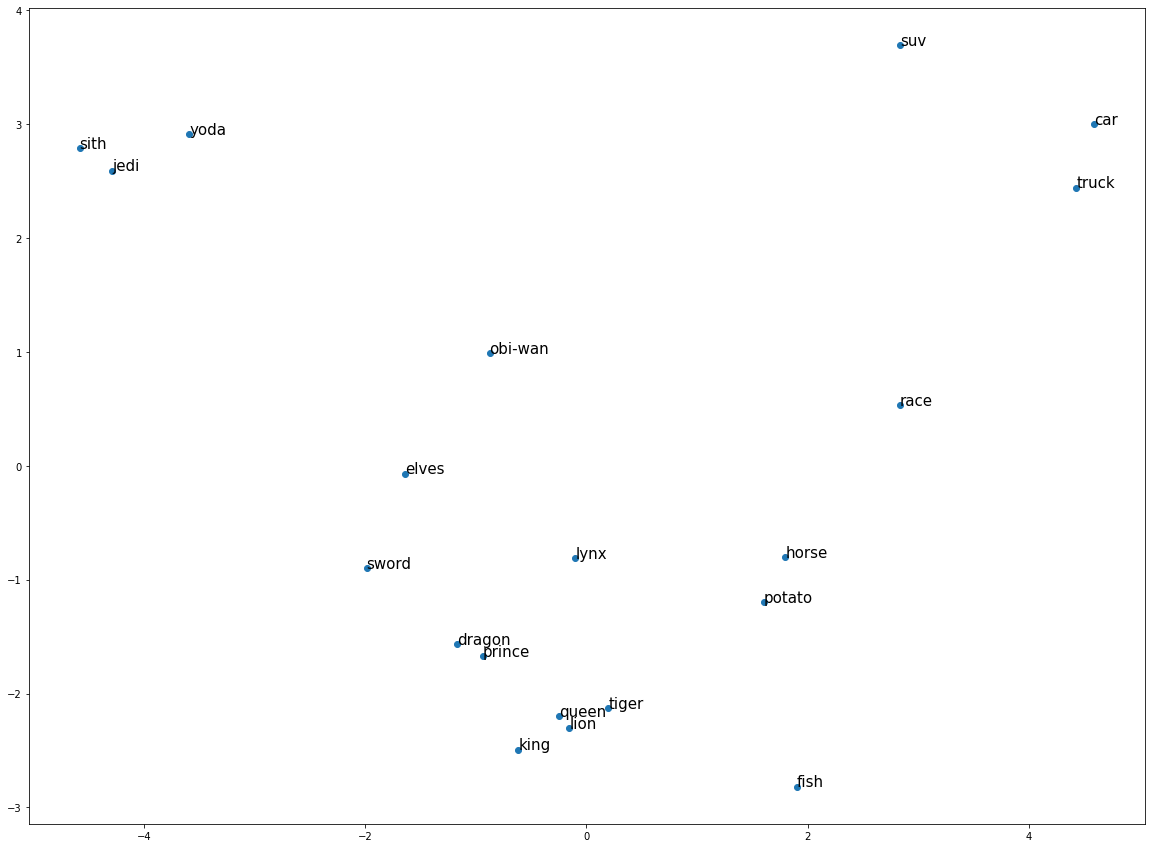

In [73]:
# create a nice big plot 
plt.figure(figsize=(20,15))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

## Follow Along
### Extract Document Vectors

Let's see how much the quality of our query will work when we try a new embedding model.

Steps:
* Extract Vectors from Each Document
* Search using KNN


In [70]:
X = [nlp(str(d)).vector for d in data]

In [72]:
pd.DataFrame(X).shape

(401, 300)

## Challenge

You will extract word embeddings from documents using Spacy's pre-trained model in the upcoming module project. 

# Review
For your module project assignment you will create vector representations of indeed.com Data Science job listings. You will then estimate a similarity model to perform searches for job descriptions. Get started with your [module project here](./LS_DS_412_Vector_Representations_Assignment.ipynb)

# Sources

* Spacy 101 - https://course.spacy.io
* NLTK Book - https://www.nltk.org/book/
* An Introduction to Information Retrieval - https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf